## Mobile Price Classification

### Problem:
We are starting our own mobile company and we want to compete with big players like Apple and Samsung. However, we are struggling with estimating the price of our mobile phones because we cannot simply make assumptions in this competitive market. To tackle this issue, we have gathered sales data from various companies. Our goal is to identify a relationship between different features of a mobile phone, such as RAM and internal memory, and its selling price. Our objective is not to predict the actual price of a mobile phone, but to determine a price range that indicates how high the price is likely to be. We hope that with the help of a machine learning model, we can better estimate the pricing of our mobile phones and compete effectively with other players in the market.

***
### Dataset:
#### Dataset columns are as follows:
- **`id`** - ID
- **`battery_power`** - Total energy a battery can store in one time measured in mAh
- **`blue`** - Has bluetooth or not
- **`clock_speed`** - Speed at which microprocessor executes instructions
- **`dual_sim`** - Has dual sim support or not
- **`fc`** - Front Camera mega pixels
- **`four_g`** - Has 4G or not
- **`int_memory`** - Internal Memory in Gigabytes
- **`m_dep`** - Mobile Depth in cm
- **`mobile_wt`** - Weight of mobile phone
- **`n_cores`** - Number of cores of processor
- **`pc`** - Primary Camera mega pixels
- **`px_height`** - Pixel Resolution Height
- **`px_width`** - Pixel Resolution Width
- **`ram`** - Random Access Memory in Megabytes
- **`sc_h`** - Screen Height of mobile in cm
- **`sc_w`** - Screen Width of mobile in cm
- **`talk_time`** - Longest time that a single battery charge will last when you are
- **`three_g`** - Has 3G or not
- **`touch_screen`** - Has touch screen or not
- **`wifi`** - Has wifi or not
- **`price_range`** - This is the target variable with value of:
    - 0 (low cost)
    - 1 (medium cost)
    - 2 (high cost)
    - 3 (very high cost)
***
### Objectives:
- Exploring and Preprocessing Data
- Build different classification models to predict the mobile phone price range
- Price range prediction for 1000 usnseen data
***
### Applied Models:
- Support Vector Machine (SVM)
- Decision Tree (DT)
- Random Forest (RF)

***
## Step 1 | Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone 
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
%matplotlib inline

# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Ignore warnings
warnings.filterwarnings('ignore')

## Step 2 | Read Dataset

In [2]:
df = pd.read_csv("train.csv") # loading the train data into a dataframe
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Step 3 | Dataset Overview

In [3]:
print(df.columns.tolist())
print(f"the total number of the rows in the train data is {df.shape[0]}")
print(f"the total number of the columns in the train data is {df.shape[1]}")
print(f"the total number of the missing values in the train data {df.isnull().sum().sum()}")
print(f"the total number of the duplicated rows in the train data is {df.duplicated().sum()}")

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
the total number of the rows in the train data is 2000
the total number of the columns in the train data is 21
the total number of the missing values in the train data 0
the total number of the duplicated rows in the train data is 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Conclusion:
- This dataset contains information from **2000** mobile phones.
- We have **21 variables** including **20 independent variables(feauters)** and **1 dependent variable(label or the target)** which is **price_range**.
- There is **no missing value** in the dataset.
- We have **8 categorical variables**: **`n_cores`** , **`price_range`**, **`blue`**, **`dual_sim`**, **`four_g`**, **`three_g`**, **`touch_screen`**, **`wifi`**
- We have 13 numeric variables: **`battery_power`**, **`clock_speed`**, **`fc`**, **`int_memory`**, **`m_dep`**, **`mobile_wt`**, **`pc`**, **`px_height`**, **`px_width`**, **`ram`**, **`talk_time`**, **`sc_h`**, **`sc_w`**

### Step 3.2 | Statistical Description of Categorical Variables

In [5]:
# Filter out categorical features
df_categorical = df[["price_range", "n_cores", "blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]].astype(str)
print(df_categorical.columns.tolist())

# Calculate number of unique values and unique values for each feature
unique_counts = df_categorical.nunique() 
print(unique_counts) 
unique_values = df_categorical.apply(lambda x: x.unique()) 
print(unique_values)
# Create new dataframe with the results
pd.DataFrame({"Number Of The Unique Values":unique_counts, "Unique Values":unique_values})

['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
price_range     4
n_cores         8
blue            2
dual_sim        2
four_g          2
three_g         2
touch_screen    2
wifi            2
dtype: int64
price_range                 [1, 2, 3, 0]
n_cores         [2, 3, 5, 6, 1, 8, 4, 7]
blue                              [0, 1]
dual_sim                          [0, 1]
four_g                            [0, 1]
three_g                           [0, 1]
touch_screen                      [0, 1]
wifi                              [1, 0]
dtype: object


,Number Of The Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


### Step 3.3 | Statistical Description of Numerical Variables

In [6]:
# Filter out numerical features
df_numerical = df.drop(df_categorical.columns, axis=1) 

# Generate descriptive statistics
df_numerical.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


## Step 4 | Univariate Analysis

To examine the dataset more precisely, we perform univariate analysis for continuous and categorical features separately:


### Step 4.1 | Categorical Variables Univariate Analysis

To examine the distribution of categorical features, we plot interactive pie charts:



In [7]:
# Create the subplots
fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}]*3]*3, vertical_spacing=0.05, horizontal_spacing=0.01)


# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(df_categorical.columns): 
    value_counts = df_categorical[feature].value_counts()
    labels = value_counts.index.tolist() 
    values = value_counts.values.tolist()

    # Define color map based on orangered color
    cmap = colors.LinearSegmentedColormap.from_list("orangered", ["orangered", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6, 
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature, 
        title_font=dict(size=25, color='black', family='Calibri')
    )
    # Add the pie chart to the subplot
    if i < 8: 
        row = i // 3 + 1 
        col = i % 3 + 1 
        fig.add_trace(pie_chart, row=row, col=col) 
    # Update the layout
fig.update_layout(showlegend=False, height=1000, width=980, 
                   title={
                          'text':"Distribution of Categorical Variables",
                          'y':0.95,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })
# Show the plot
fig.show()

### Conclusion:
- Mobile phones are divided with exactly the **same frequency across the 4 price_range classes**. Therefore, **the dataset is completely balanced**.
- The mobile phones in the data set have almost the **same frequency** in terms of having or not having **Bluetooth**, **4G**, **touch screen**, **Wifi** as well as supporting **two SIM cards** or not and the **number of processing cores** used.
- Around **76%** of the mobile phones support **3G**.

### Step 4.2 | Numerical Variables Univariate Analysis

To examine the distribution of numerical features, we plot histograms:

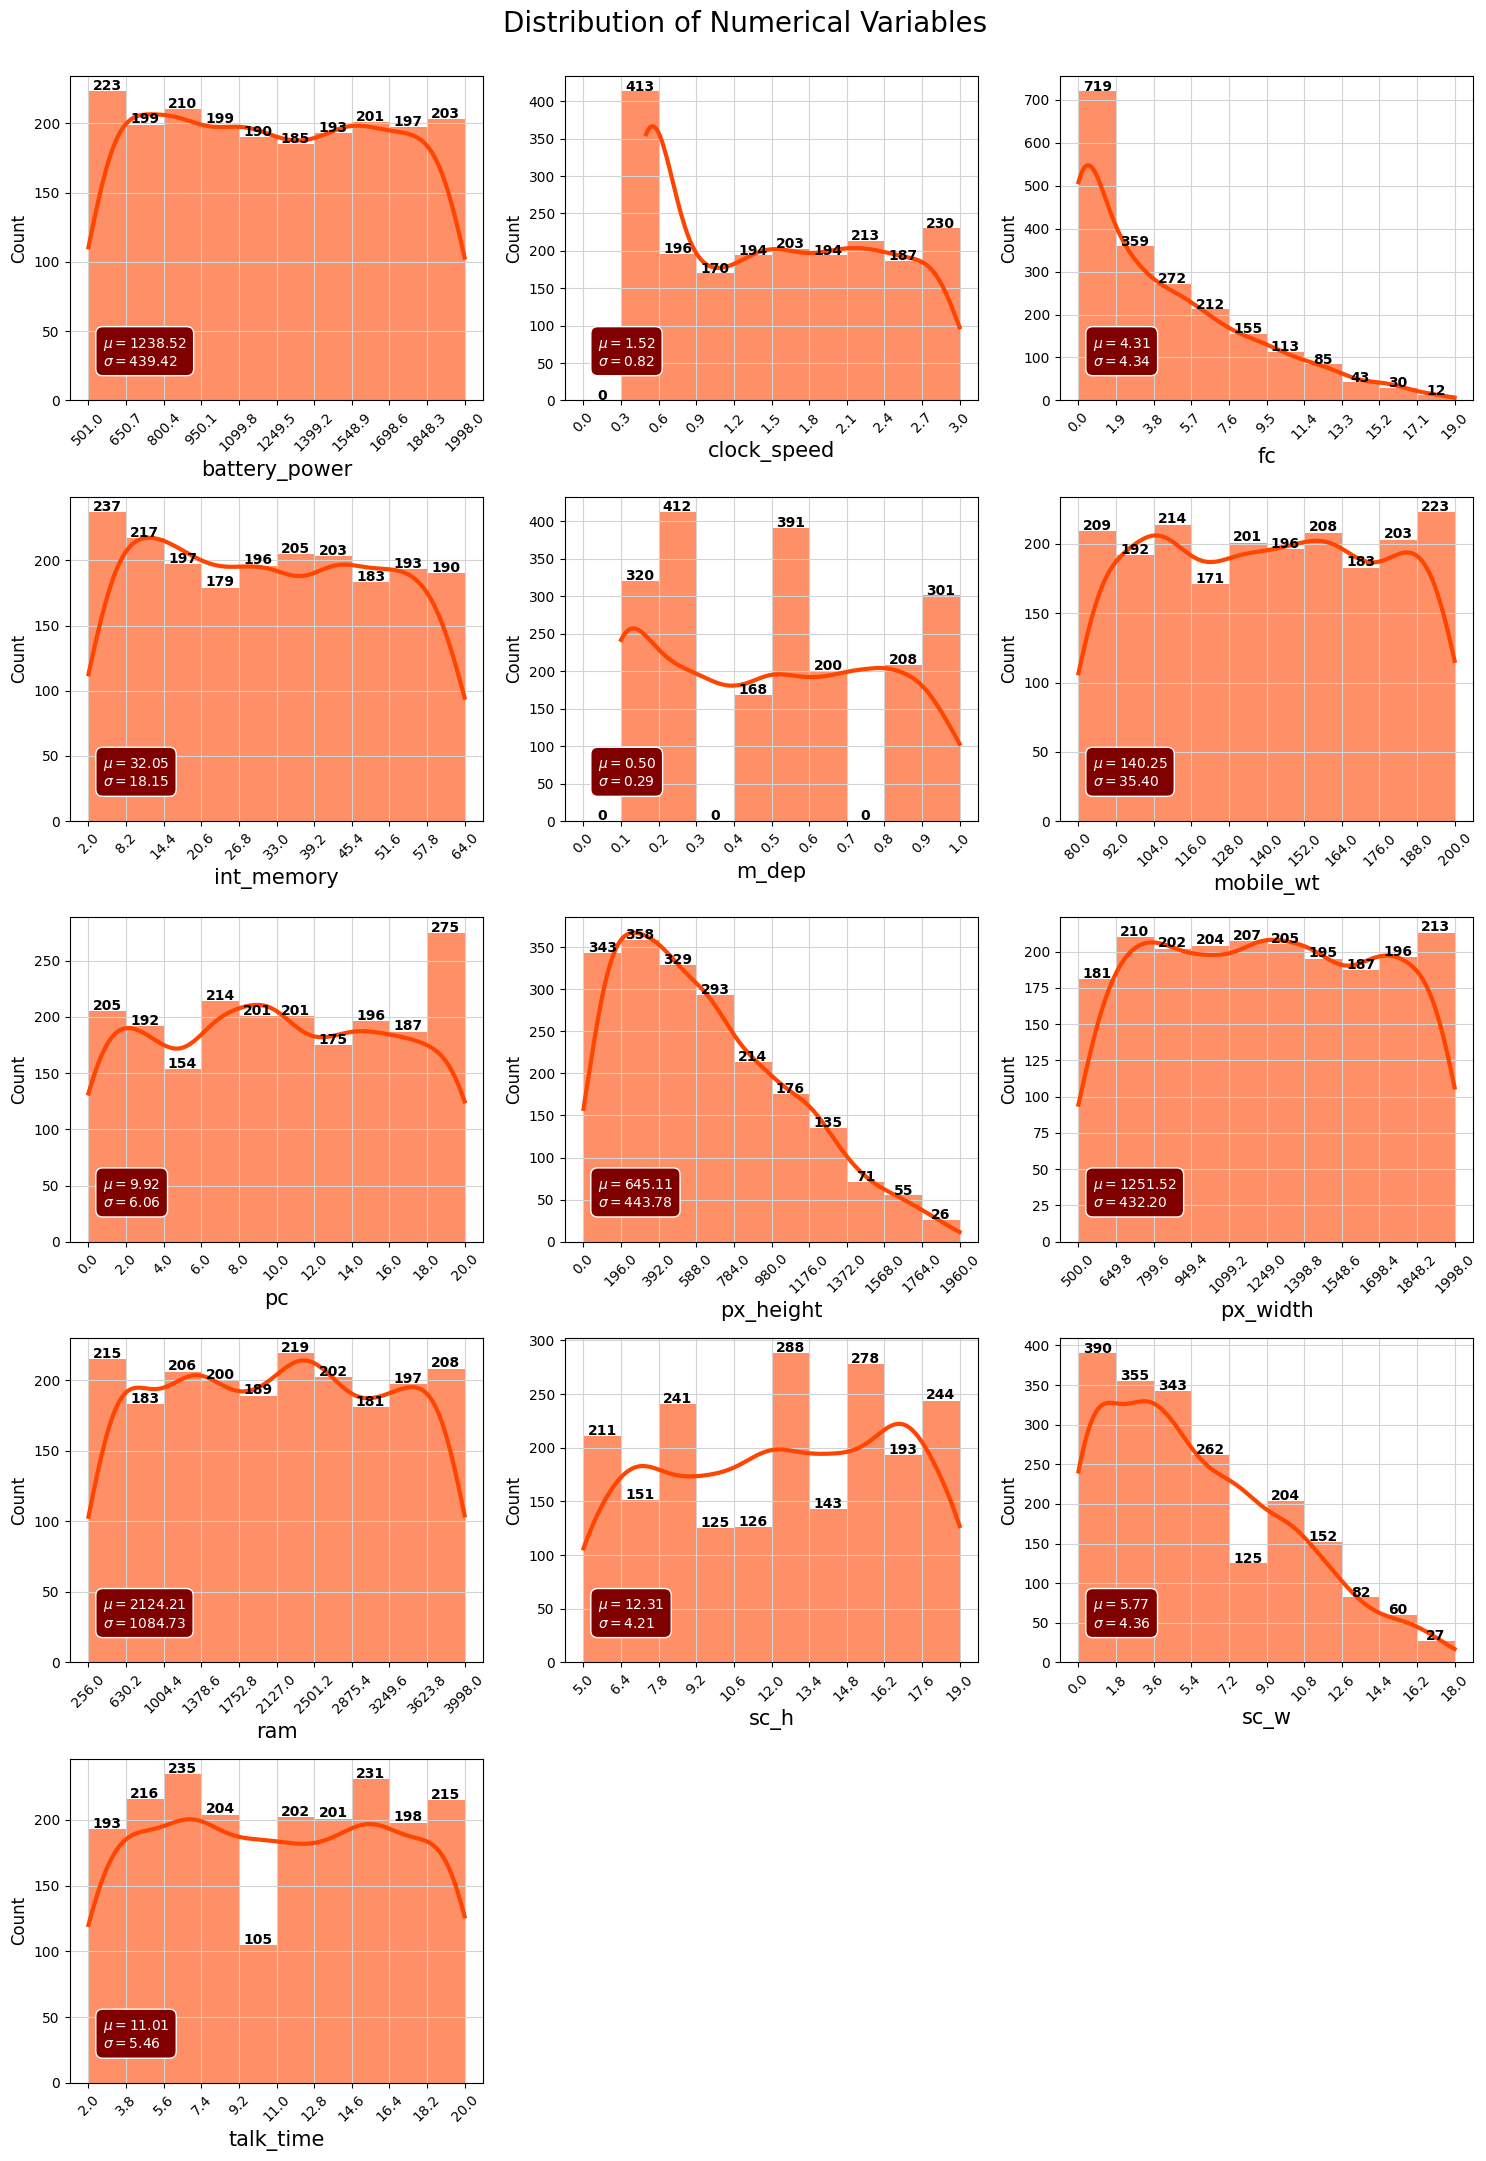

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,22))
c = 'orangered'

for i, col in enumerate(df_numerical.columns):
    x = i//3 
    y = i%3 
    values, bin_edges = np.histogram(df_numerical[col], range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max())))                
    graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[x,y], edgecolor='none', color=c, alpha=0.6, line_kws={'lw': 3})
    ax[x,y].set_xlabel(col, fontsize=15) 
    ax[x,y].set_ylabel('Count', fontsize=12) 
    ax[x,y].set_xticks(np.round(bin_edges,1)) 
    ax[x,y].set_xticklabels(ax[x,y].get_xticks(), rotation = 45) 
    ax[x,y].grid(color='lightgrey')
    for j,p in enumerate(graph.patches): 
        ax[x,y].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),ha='center', fontsize=10 ,fontweight="bold")
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df_numerical[col].mean(), 
    r'$\sigma=%.2f$' %df_numerical[col].std() 
    ))
    ax[x,y].text(0.08, 0.2, textstr, transform=ax[x,y].transAxes, fontsize=10, verticalalignment='top',
                color='white', bbox=dict(boxstyle='round',facecolor='maroon', edgecolor='white', pad=0.5))
ax[4, 1].axis('off') 
ax[4, 2].axis('off') 
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.subplots_adjust(top=0.95)
plt.show()

### Conclusion:
- By looking at the graphs above, we can easily understand the statistical values of each feature, including the **minimum** and **maximum** values, and the **average** and **standard deviation**.
- In some features, including **px_height (Pixel Resolution Height)** and **sc_w (Screen Width of mobile in cm)**, many values close to **zero** are observed, which seem like **noise**!

## Step 5 | Data Cleansing

**Data cleansing** is the process of identifying and correcting errors in data. It is important in machine learning as the accuracy and reliability of the resulting model are heavily dependent on the quality of the input data.

### Step 5.1 | Duplicate Values Detection

In [9]:
print(f"The total number of the duplicated rows in the data is {df.duplicated().sum()}")

The total number of the duplicated rows in the data is 0


### Conclusion:
- The dataset **does not contain duplicate samples**.

***
### Step 5.2 | Missing Value Detection

In [10]:
print(f"the total number of the missing values in the data is {df.isnull().sum().sum()}")

the total number of the missing values in the data is 0


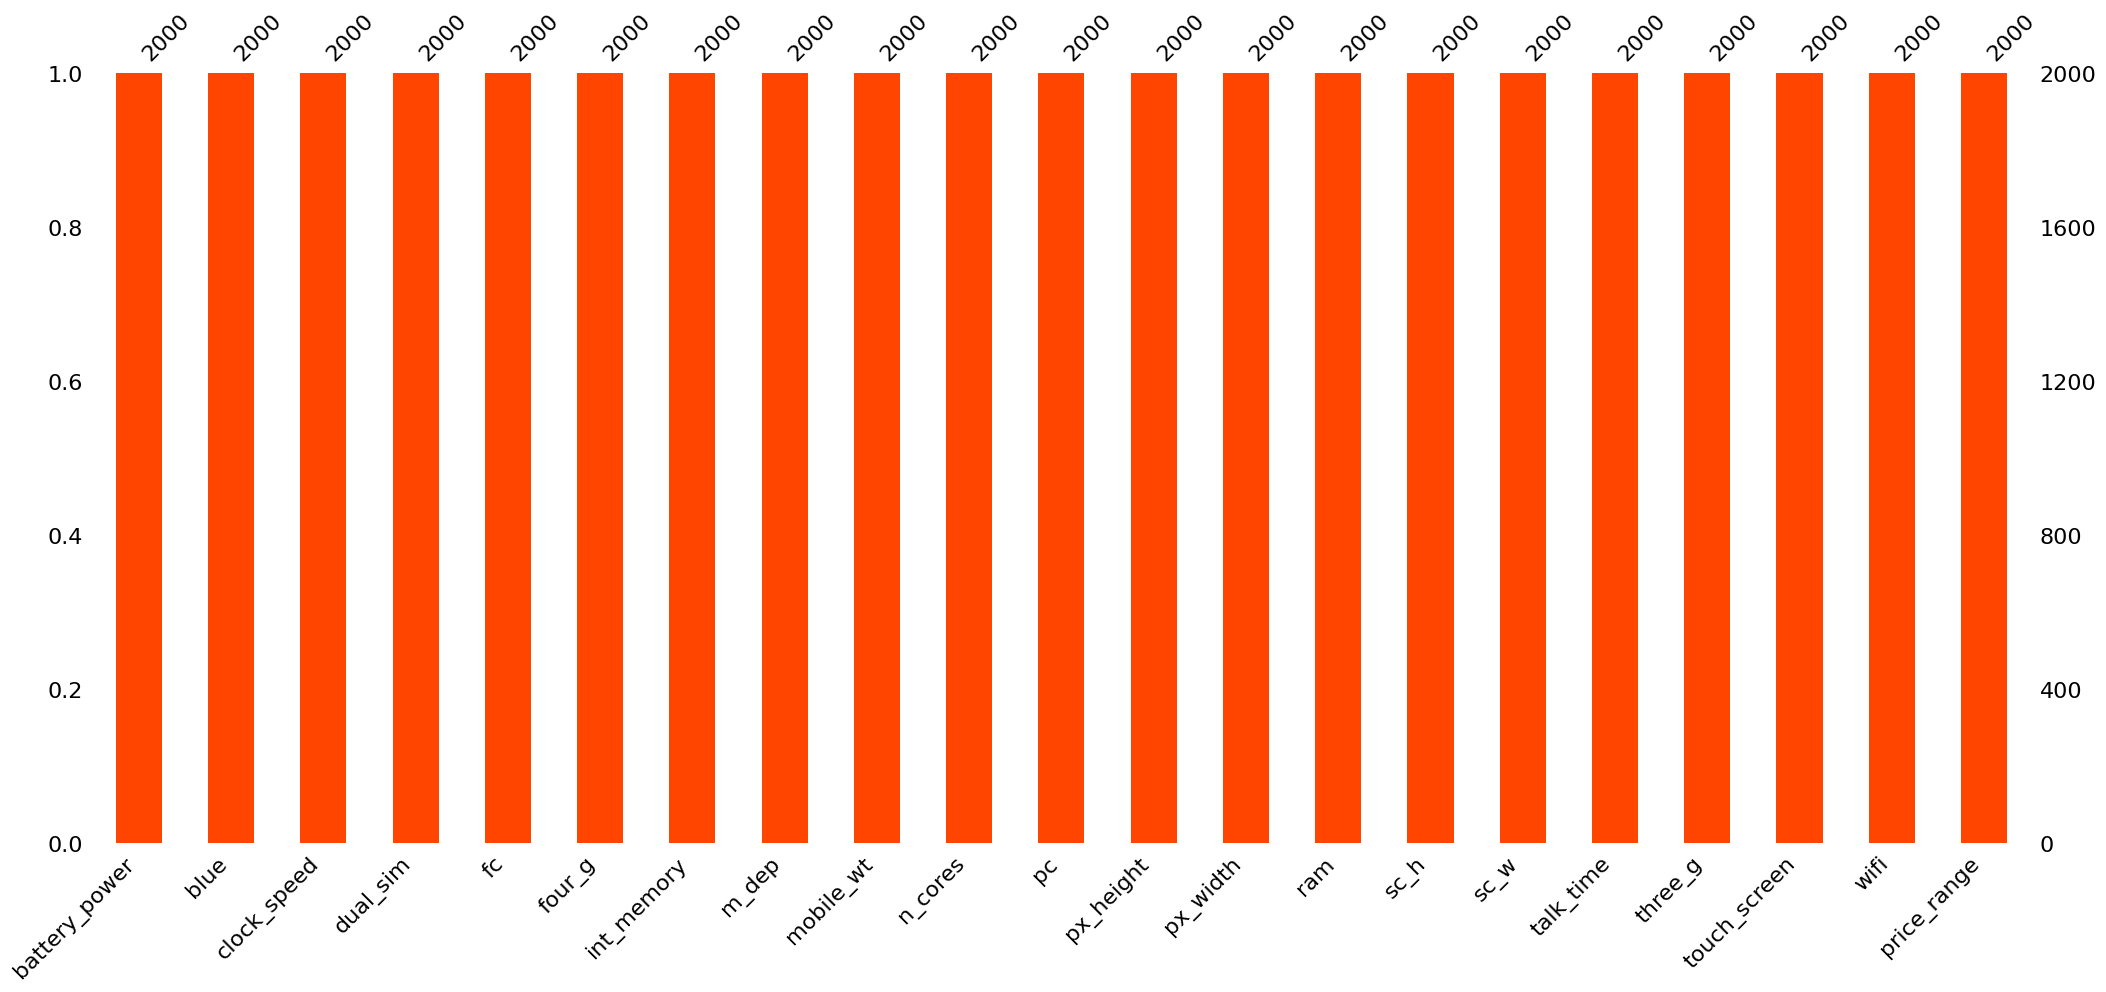

In [11]:
# Generate the missing values matrix using missingno.bar()
msno.bar(df, color='orangered') 

# Display the plot
plt.show()

### Conclusion:
- There is **no missing value** in the dataset

***
### Step 5.3 | Noise Detection

Let's take a look at **`px_height`** **(Pixel Resolution Height)** and **`sc_w`** **(Screen Width of mobile in cm)** feature distributions again:

[343 358 329 293 214 176 135  71  55  26]
[   0.  196.  392.  588.  784.  980. 1176. 1372. 1568. 1764. 1960.]


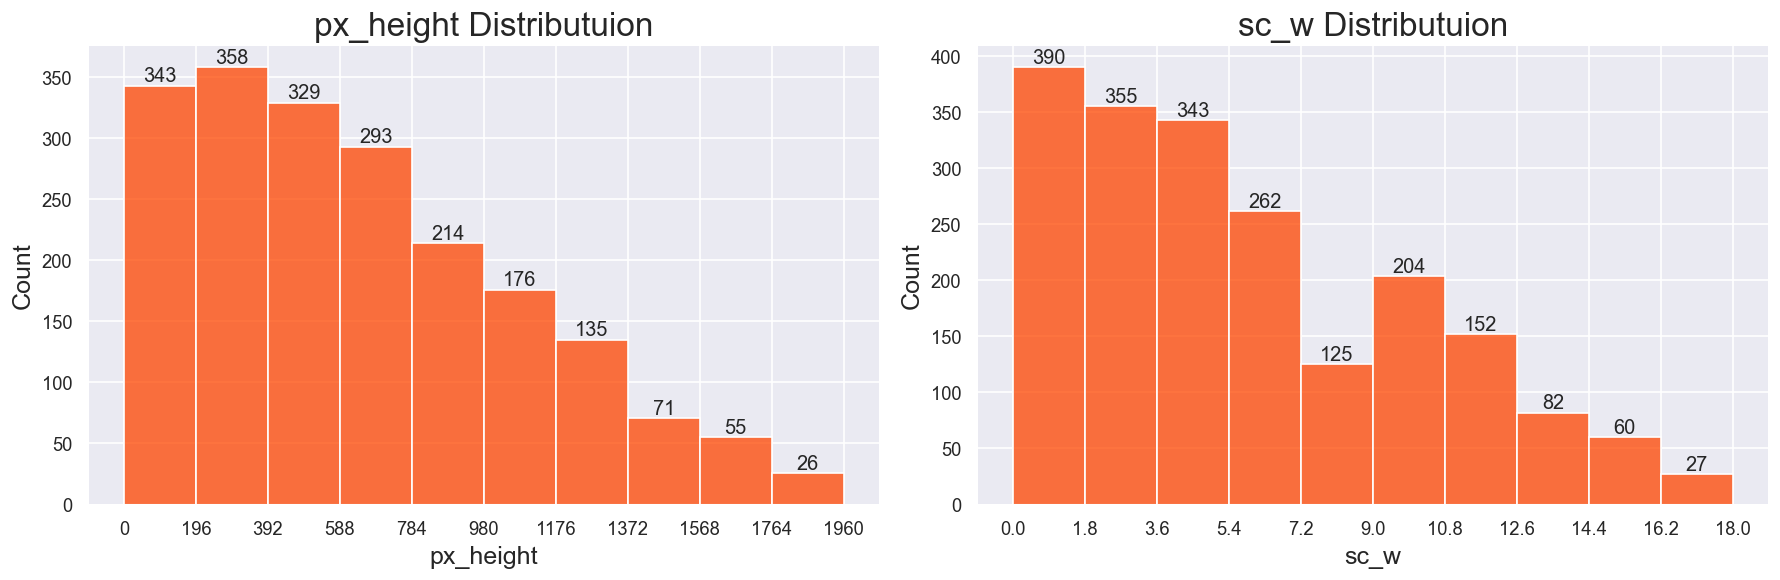

In [12]:
sns.set(rc = {'axes.labelsize' : 15})               
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)

# Plot px_height histogram:
values, bin_edges = np.histogram(df['px_height'], range=(np.floor(df['px_height'].min()), np.ceil(df['px_height'].max())))                                     
print(values) 
print(bin_edges) 
graph1 = sns.histplot(x='px_height', data=df, bins=bin_edges, color='orangered', ax=ax[0])
ax[0].set_xticks(np.round(bin_edges,1))
ax[0].set_title('px_height Distributuion', fontsize=20) 
for cont in graph1.containers: 
    graph1.bar_label(cont) 

# Plot sc_w histogram:
_, bin_edges = np.histogram(df['sc_w'], range=(np.floor(df['sc_w'].min()), np.ceil(df['sc_w'].max())))
graph2 = sns.histplot(x='sc_w', data=df, bins=bin_edges, color='orangered', ax=ax[1])
ax[1].set_xticks(np.round(bin_edges,1)) 
ax[1].set_title('sc_w Distributuion', fontsize=20)      
for cont in graph2.containers: 
        graph2.bar_label(cont) 
        
plt.tight_layout()
plt.show()

### Problem:
As seen **px_height (Pixel Resolution Height)** and **sc_w (Screen Width of mobile in cm)** contain many values of zero and close to zero, which look like noise, but since we do not have enough knowledge in this domain, we cannot set a **definite** lower limit as an acceptable value for these features. Anyway after researching on the internet, we found out that:
- Some of the earliest commercially available mobile phones, like the **Motorola DynaTAC 8000X**, had a screen resolution of only **5 pixels in height**.
- Some of the **earliest mobile phones** with screens had a width of around **2-3 centimeters**.

### Strategy:
In the following, one of the models we intend to implement is **`SVM`** and one of the advantages of SVM is that it is **less sensitive to noise and outliers** in the data compared to other algorithms, such as **decision trees**. Therefore, according to the above explanations, we consider the value of **5** for **px_height** and the value of **2** for **sc_w** as the minimum acceptable values and detect the index of noise samples, but do not take action to clean or impute them. We don't do it until we reach noise-sensitive models like decision tree!

In [13]:
# Detect Noise values in sc_w 
sc_w_NoiseIndex = df[df["sc_w"]<2].index 

# Detect Noise values in px_height
px_height_NoiseIndex = df[df["px_height"]<5].index 

In [14]:
print(f"the number of detected noise values for sc_w: {len(sc_w_NoiseIndex)}") 
print(f"the number of detected noise values for px_height: {len(px_height_NoiseIndex)}") 

the number of detected noise values for sc_w: 390
the number of detected noise values for px_height: 9


***
### Step 5.4 | Feature Selection

### Definition:
**Feature selection** is the process of **selecting a subset of relevant features from a larger set of features in a dataset** to improve the performance of a machine learning model. The selected features are used to build a model that can accurately predict the target variable, while **ignoring irrelevant or redundant features** that can negatively impact model performance.

### Advantages:
- 1.It can **improve model accuracy by reducing overfitting**, which occurs when a model is too complex and captures noise in the data instead of the underlying patterns.

- 2.It can **reduce the time and computational resources** required to train a model by removing unnecessary features, leading to faster model development and deployment.
- 3.It can **improve the interpretability of the model** by identifying the most important features that are driving the predictions, making it easier for humans to understand the model and its decision-making process.

### Strategy:
- Among the filter methods, we will perform the **`Pearson correlation coefficient`**.
- We will perform **`Drop-column Feature Importance`** as a Wrapper method.
- We will implement models such as **`Decision Tree`** and **`Random Forest`** as Embedded methods.

In [15]:
print(f"the total number of the feauters we have in the data is {len(df.columns.tolist())-1}") 

the total number of the feauters we have in the data is 20


### step 5.4.1 | Pearson Correlation¶
**Pearson Correlation** is a statistical measure that calculates the strength and direction of the linear relationship between two variables, with values ranging from **-1** **`(perfect negative correlation)`** to **1** **`(perfect positive correlation)`**.

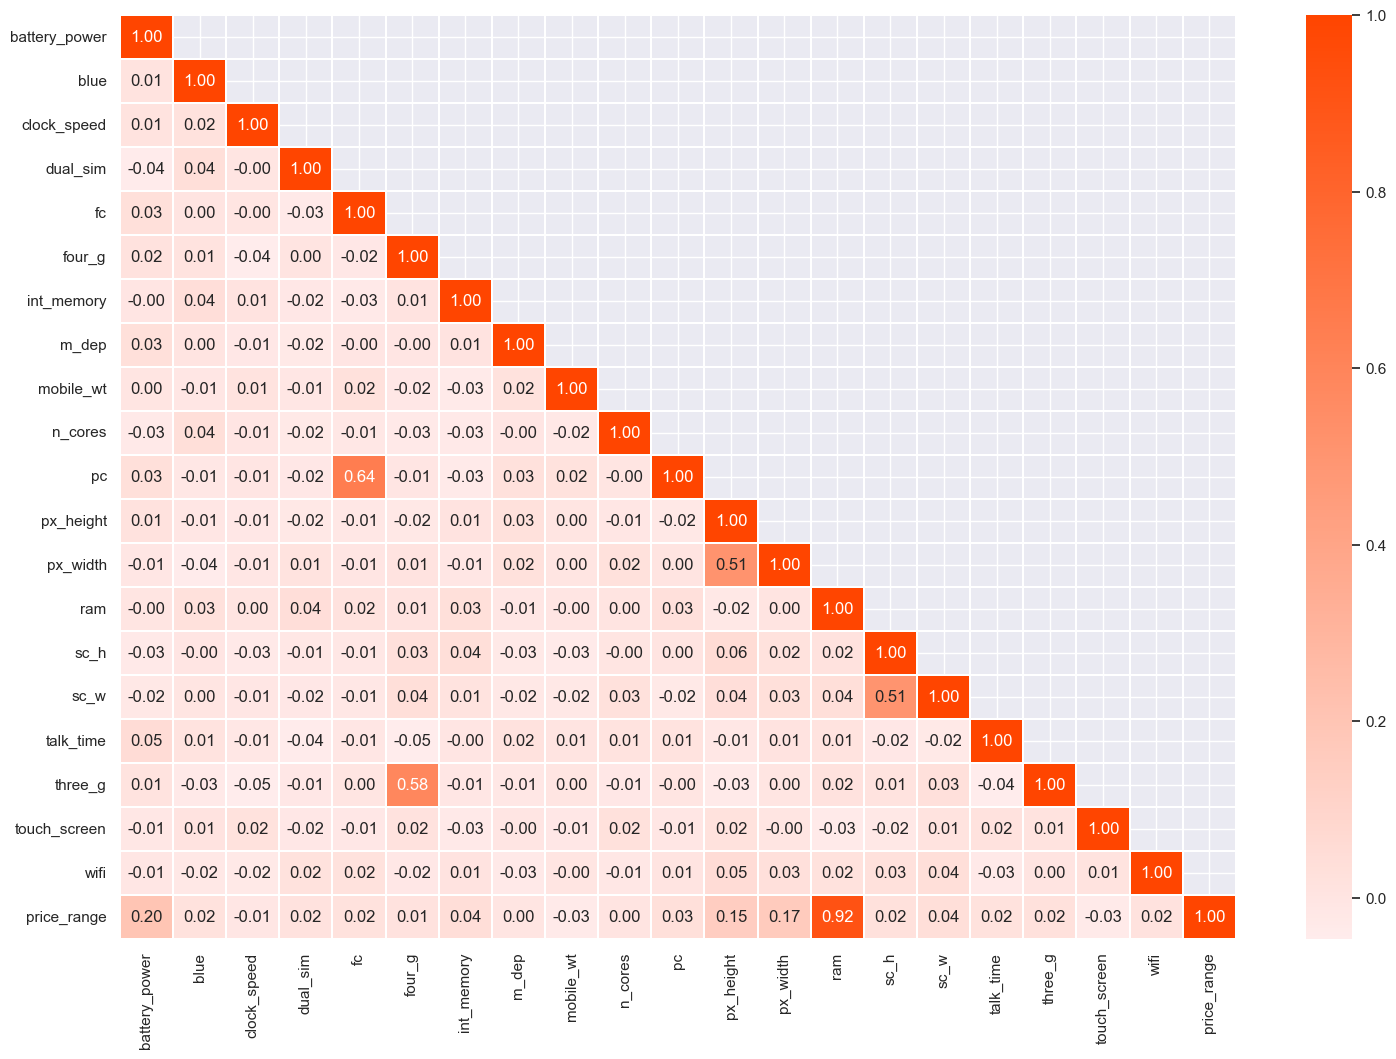

In [16]:
# Define a colormap
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])

# Calculation of the Spearman correlation
target = 'price_range'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1) 
corr = df_ordered.corr() 

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, cmap=orangered_cmap, fmt='.2f', linewidths=0.2)
plt.show()

### Conclusions:
- `price_range` is highly correlated with `ram` (ρ = 0.92).
- `price_range` has a low correlation value with the rest of the features, but this cannot be used as a criterion to remove these features since the pearson correlation only expresses the linear relationship between two variables.
- Among the features, two features ‍‍‍‍‍‍`pc` and `fc` have the highest correlation with each other (ρ = 0.64).

### Step 5.4.2 | Drop-column Feature Importance

**Drop-column Feature Importance** is a machine learning technique used to evaluate the importance of features in a dataset. It involves measuring the impact of removing a feature on the performance of a pre-trained model. The feature whose removal causes the largest decrease in the model's performance is considered the most important feature. Drop-column feature importance can be used in conjunction with algorithms that provide a built-in measure of feature importance. It is computationally efficient and can provide a more precise measure of feature importance.

### Note:
- In this project, the target contains 4 classes and the it is **completely balanced**. Also, none of the classes is of particular importance compared to the other. Therefore, in this project, **accuracy** can be a good metric to measure the performance of the models.

Next, we will implement Drop-column Feature Importance Technique through a function using cloning:



In [17]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = [] 
    # Clone the model
    model_clone = clone(model) 
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train) 
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring='accuracy').mean()     
    # Iterate over all features and store feature importance
    for col in X_train.columns: 
        # Clone the model
        model_clone = clone(model) 
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train) 
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring='accuracy').mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
    return importances_df

Define a function to **visualize** the results of **Drop-column Feature Importance** technique using bar charts:

In [18]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='orangered')
    # orient='h' deeh ma3naha en ana 3awz el bars teb2a horizontal
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

In the next steps, we will use these functions before building our final model regarding each classification algorithm to detect redundant features.




## Step 6 | Bivariate Analysis

We have considered each feature individually in univariate analysis in **Step 4**. Now we will examine the features again with respect to the target variable. First, we will identify the relationship between the **target variable** and the **categorical features**. Then we will look at the **numerical features** compared to the **target variable**.

### Step 6.1 | Categorical Features vs Target

We will create **100% stacked bar charts** showing the proportion of `price_range` for each category of categorical features seprately:

In [19]:
# Define the target name in a variable for simplicity
Target = 'price_range'

# Define a list containing names of the categorical features in the dataset 
Cat_Features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

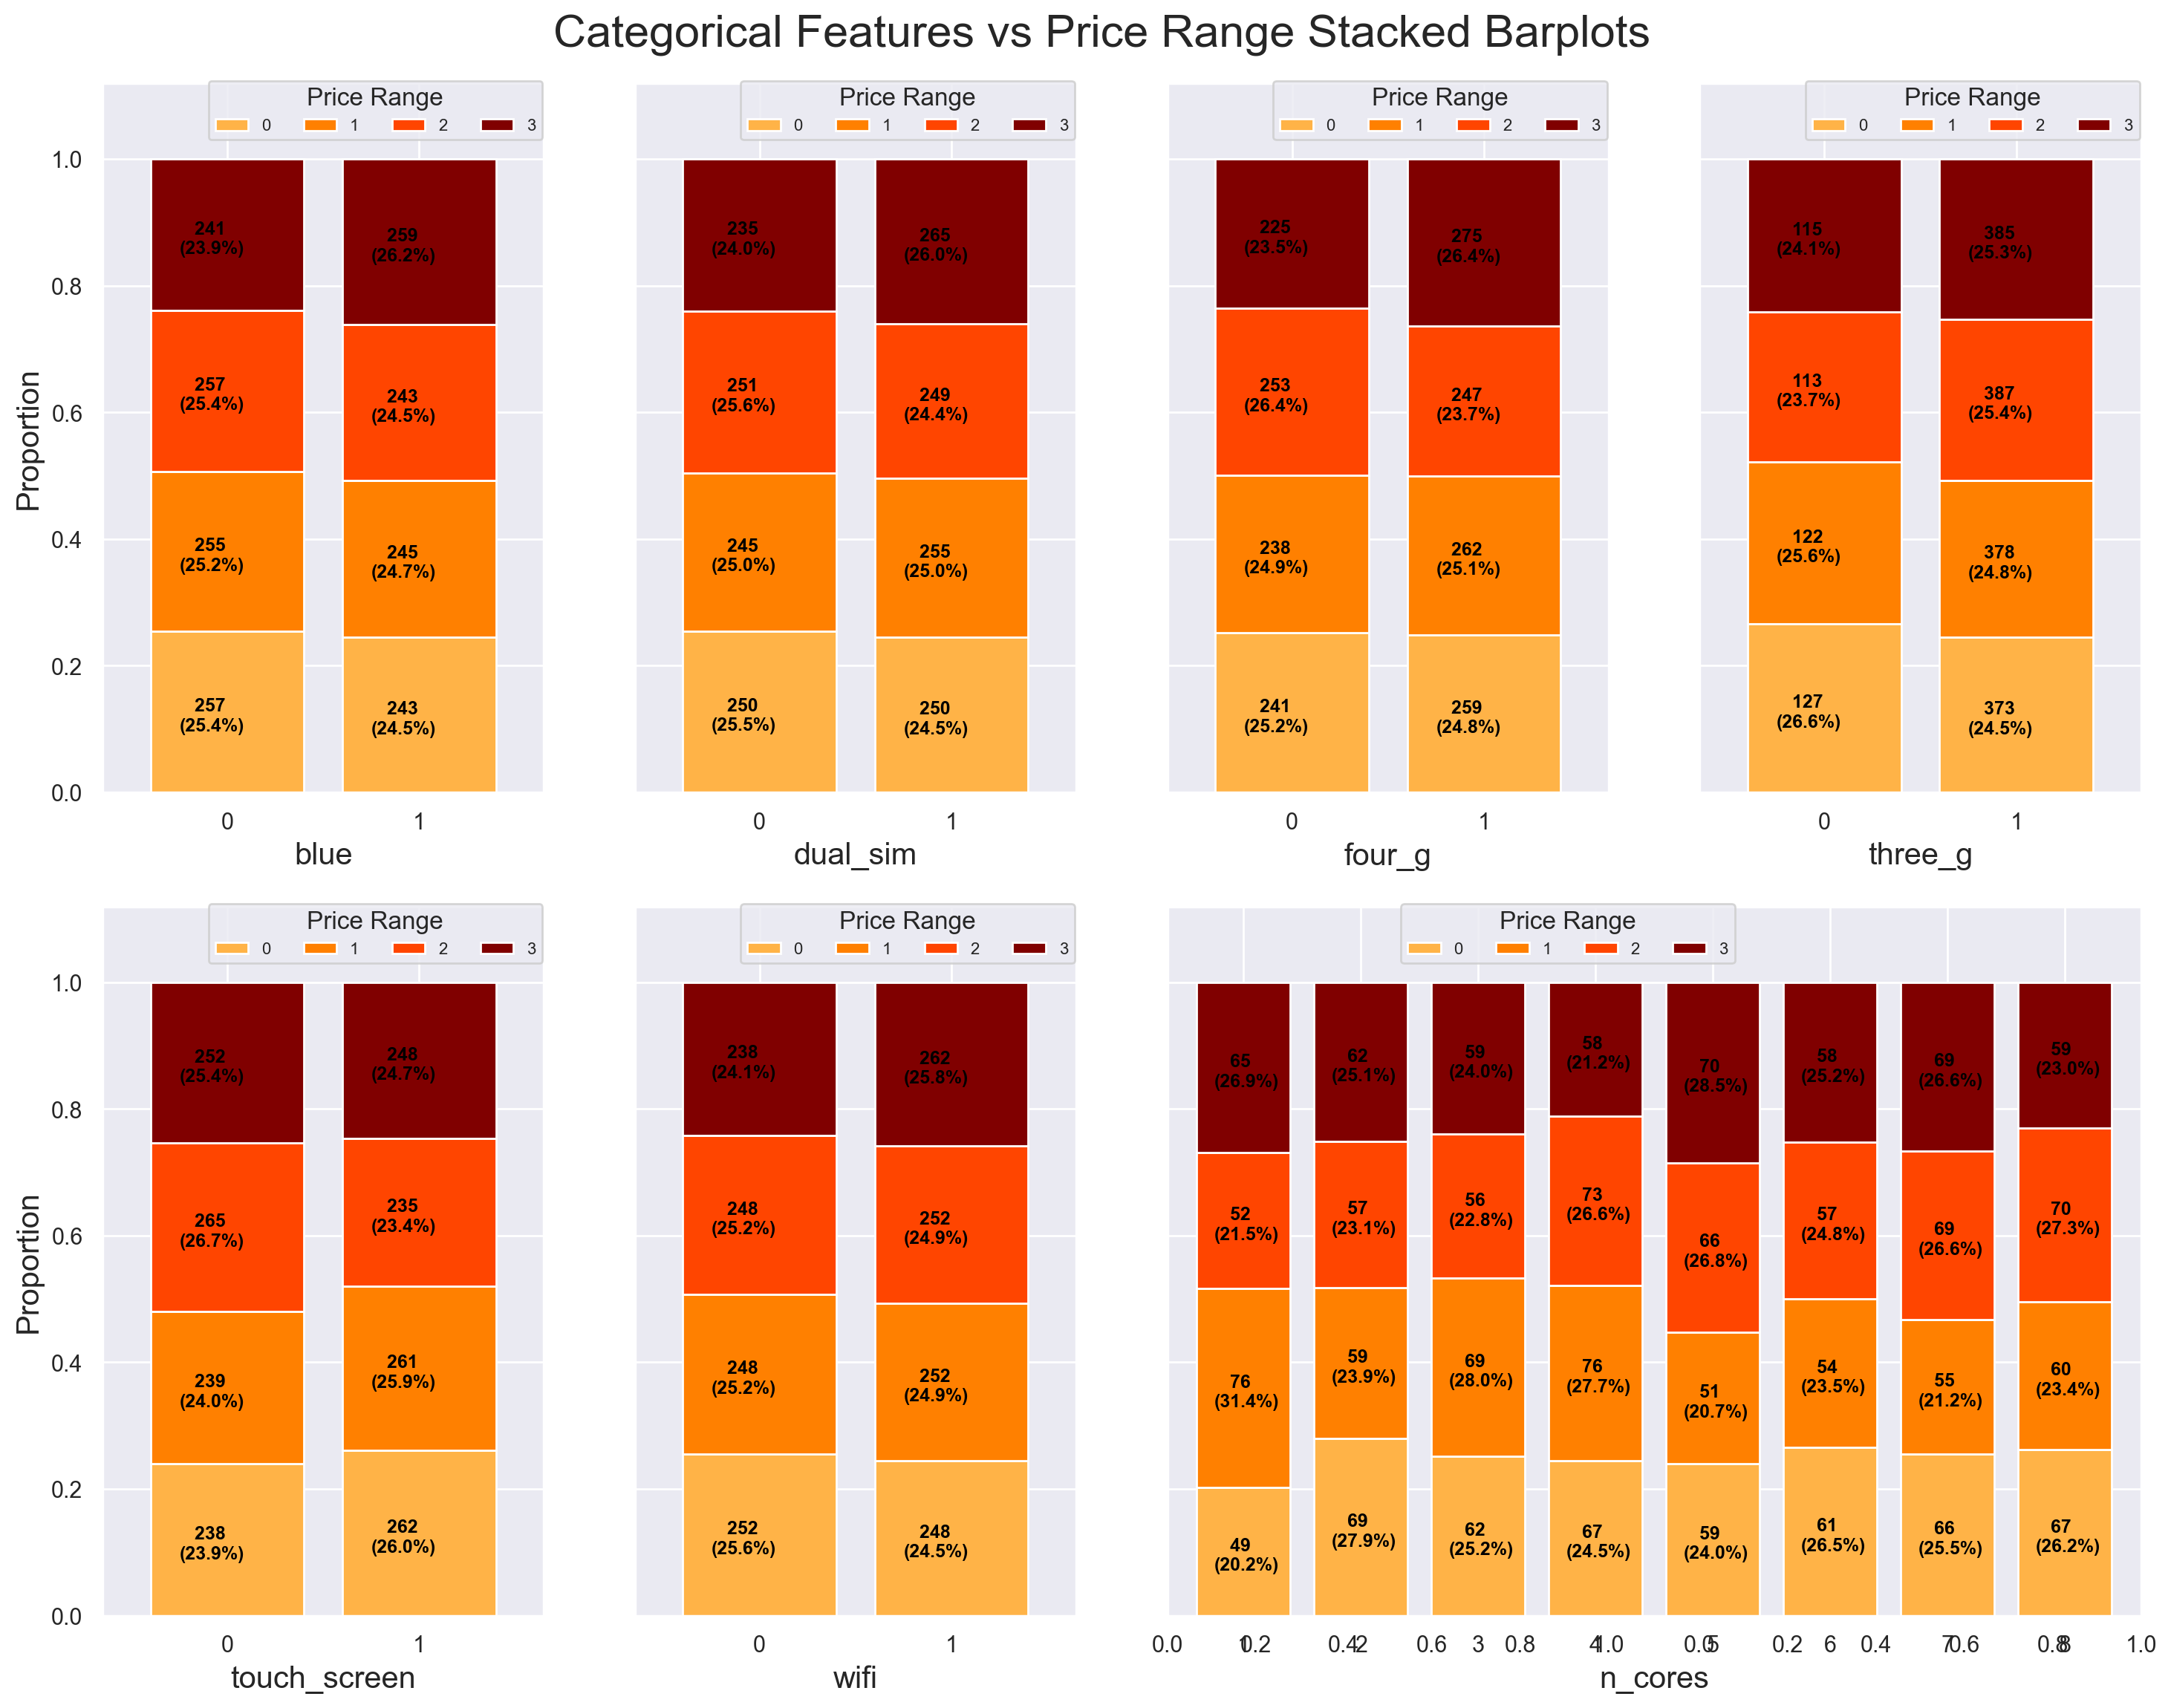

In [20]:
# Create a 2x4 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,12), dpi=200) # this will create 2 rows and 4 columns

# Span subplot over two columns
ax[1,2] = plt.subplot2grid((2,4), (1,2), colspan=2)

for i,col in enumerate(Cat_Features): 
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')
    cmp = ListedColormap(['#ffb347', '#ff8000', '#ff4500','#800000'])
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    for idx, val in enumerate([*cross_tab.index.values]): 
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.25, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'   {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    # Add legend
    ax[x,y].legend(title='Price Range', loc=(0.24,0.92), fontsize=8, ncol=4)
    # Set y limit
    ax[x,y].set_ylim([0,1.12]) # deeh el values ely mawgooda 3la el y-axis
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0) 
    # Increase xlabel & ylabel font sizes
    ax[x,y].set_ylabel('Proportion', fontsize=15) 
    ax[x,y].set_xlabel(col, fontsize=15) 

plt.suptitle('Categorical Features vs Price Range Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

### Conclusions:
- Among the categorical features seen in the above plot, ‍‍‍‍‍‍‍`three_g`, `n_cores`, and `touch_screen` have a greater impact on the target because by changing the category in these features, the percentage of samples belonging to each class of the target has changed more significantly

### Step 6.2 | Numerical Features vs Target

We will try to find the mean and distribution of numerical features across different price_range classes:



In [21]:
Num_Features = df_numerical.columns

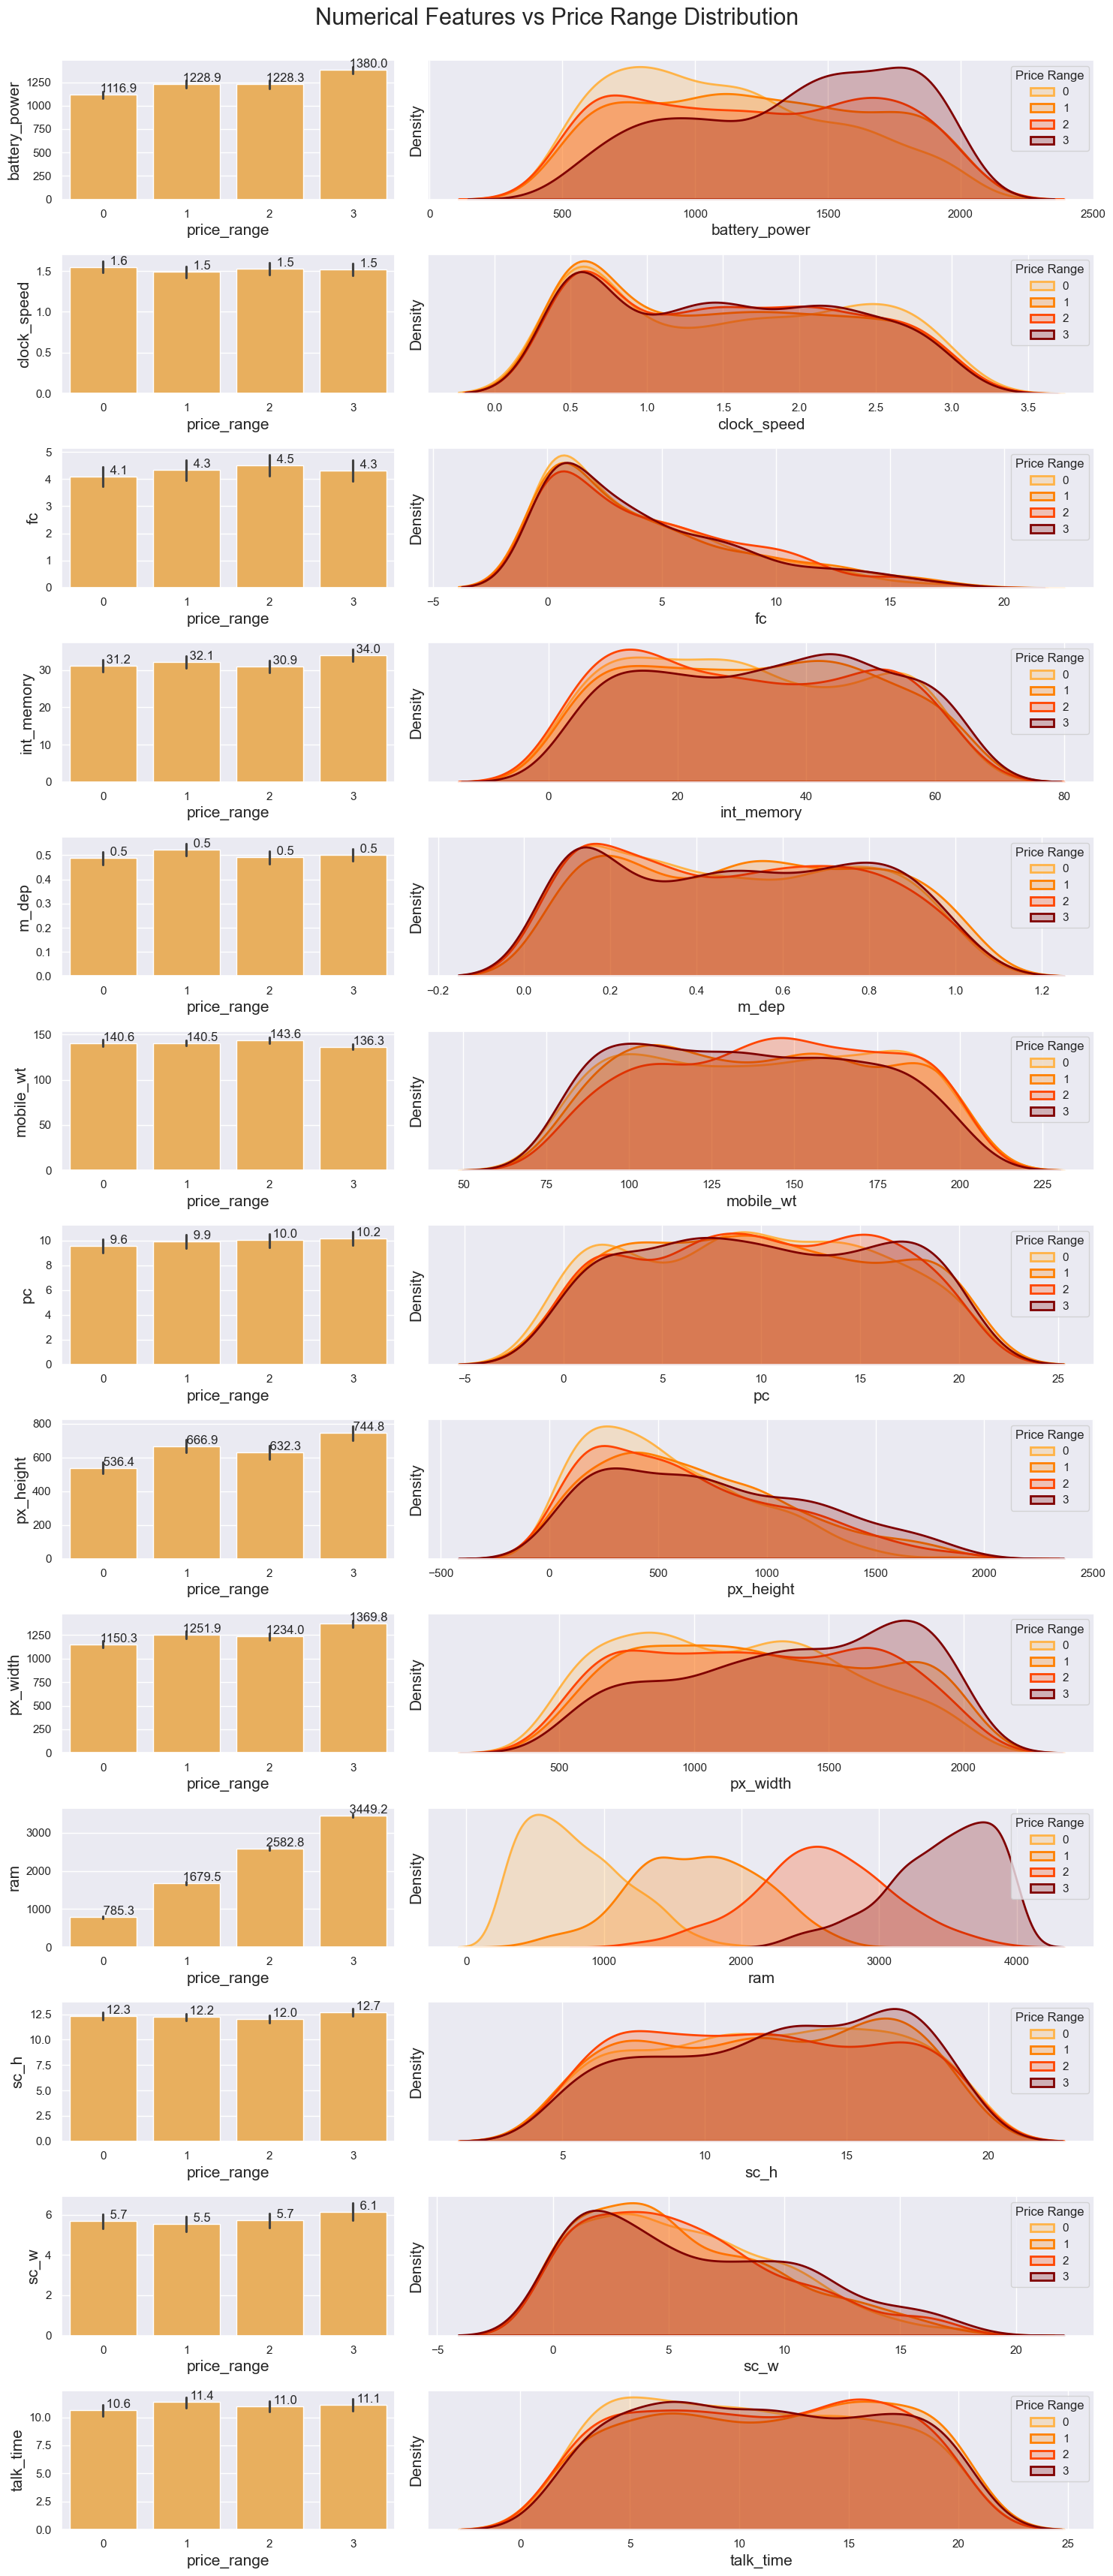

In [22]:
#  Define Seaborn palette
sns.set_palette(['#ffb347', '#ff8000', '#ff4500','#800000'])

# Create a 13x2 grid of subplots
fig, ax = plt.subplots(13, 2, figsize=(15,35), gridspec_kw={'width_ratios': [1, 2]}) 

for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    sns.kdeplot(data=df[df[Target]==2], x=col, fill=True, linewidth=2, ax=ax[i,1], label='2')
    sns.kdeplot(data=df[df[Target]==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    ax[i,1].set_yticks([]) 
    ax[i,1].legend(title='Price Range', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers: 
        graph.bar_label(cont, fmt='         %.1f') 
        

for i in range(len(ax)): 
    for j in range(len(ax[i])): 
        ax[i,j].set_xlabel(ax[i,j].get_xlabel(), fontsize=15)
        ax[i,j].set_ylabel(ax[i,j].get_ylabel(), fontsize=15)

plt.suptitle('Numerical Features vs Price Range Distribution', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

### Conclusions:
- Among the numerical features seen in the above diagram, first the `ram` feature and then the `battery_power`, `px_height` and `px_width` have the greatest impact on the target because the distribution and average amount of data belonging to each class of the target in these features have changed significantly!

## Step 7 | SVM Model Building

# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a popular machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates the data points into different classes. The hyperplane is determined by maximizing the margin, which is the distance between the hyperplane and the nearest data points of each class.

## Advantages of SVM Classifier:
- **Robust to noise & outliers**: SVM is less sensitive to noise & outliers compared to other algorithms, making it suitable for tasks where the presence of noise & outliers is expected.
- **Good generalization**: SVM is known for its ability to generalize well, meaning it can perform well on new and unseen data.
- **Handles non-linear data**: SVM can handle non-linear decision boundaries, which makes it useful in situations where the data is not linearly separable.
- **Flexibility in kernel selection**: SVM provides flexibility in selecting different kernel functions such as linear, polynomial, and radial basis function (RBF), allowing it to work with a wide range of datasets.
- **Effective in high-dimensional spaces**: SVM can work well with high-dimensional datasets, which is useful in situations where the number of features exceeds the number of samples.

## Disadvantages of SVM Classifier:
- **Computationally intensive**: SVM is computationally intensive, meaning it can be slow and require a lot of memory when working with large datasets.
- **Sensitivity to hyperparameters**: SVM is sensitive to the choice of parameters such as the kernel function and regularization parameters, which can affect its performance.
- **Limited interpretability**: SVM does not provide explicit models for understanding the relationship between features and the target variable, making it difficult to interpret the results.
- **Bias-Variance Tradeoff**: Like all machine learning algorithms, SVM is subject to the bias-variance tradeoff, meaning that it can be overfit or underfit the data, leading to poor performance.


***
### Step 7.1 | Scale Data using Standard Scaler

**SVM (Support Vector Machine)** is a **distance-based** classifier. SVM works by finding the boundary that best separates the data into classes, while maximizing the margin (the distance between the boundary and the closest data points from each class, known as support vectors). This means that SVM is based on the concept of **distance** and seeks to find the optimal boundary that maximizes the distance between the classes. Therefore, Standard Scaling must be performed before model building:

Define the features (X) and the output labels (y) of the given dataset:

In [23]:
X = df.drop("price_range", axis=1) 
y = df["price_range"] 
print(y.value_counts()) 
print("-"*50)
print(y.value_counts()/len(y))

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64
--------------------------------------------------
price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: count, dtype: float64


perform train test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("-"*50)
print(y_train.value_counts())
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts())
print(y_test.value_counts()/len(y_test))

(1600, 20)
(1600,)
(400, 20)
(400,)
--------------------------------------------------
price_range
2    400
0    400
3    400
1    400
Name: count, dtype: int64
price_range
2    0.25
0    0.25
3    0.25
1    0.25
Name: count, dtype: float64
price_range
3    100
2    100
1    100
0    100
Name: count, dtype: int64
price_range
3    0.25
2    0.25
1    0.25
0    0.25
Name: count, dtype: float64


Scale data using StandardScaler:

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Step 7.2 | SVM Hyperparameter Tuning

### SVM Hyperparameter Tuning:
Hyperparameter tuning is important for SVM classifiers. SVM classifiers have several hyperparameters that need to be set before training the model, and the performance of the model can be highly sensitive to the values of these hyperparameters.

### SVM Classifier Hyperparameters:
- **C** - This hyperparameter controls the **regularization** strength of the model. C represents the penalty parameter for misclassification. It determines the tradeoff between achieving a low training error and a low testing error. A larger value of C allows the model to fit the training data more closely, which may result in better performance on the training set but may lead to overfitting and poor performance on new data. On the other hand, a smaller value of C encourages the model to have a larger margin and to be more tolerant of misclassifications, which can result in better generalization to new data.
- **kernel** - This hyperparameter defines the type of kernel function used to transform the input data into a higher dimensional space where a linear boundary can be found. Common kernel functions include the linear, polynomial, rbf (radial basis function), sigmoid and precomputed kernels.
- **gamma** - Kernel coefficient for rbf, poly and sigmoid kernels.
- **degree** - This hyperparameter is only relevant when using the polynomial kernel. It defines the degree of the polynomial function used to transform the input data.
- **decision_function_shape** - The decision_function_shape hyperparameter in SVM classifier specifies the strategy used to construct the multi-class decision function, and can take two values: `ovr` (one-vs-rest) and `ovo` (one-vs-one). The choice of strategy does not usually affect overall accuracy but can impact computational efficiency and interpretability. The `ovr` strategy is more computationally efficient but may lead to imbalanced class distributions, while the `ovo` strategy is more robust to noise and avoids imbalanced class distributions, but can be computationally expensive. The default value of 'ovr' is often used, and the choice of strategy is not a critical hyperparameter for most problems.

We will define a function that finds the optimal combination of hyperparameters to achieve the best **accuracy** for our classifier. The function uses **GridSearchCV** and **cross-validation (StratifiedKFold)** to evaluate different combinations of hyperparameters, and selects the combination with the highest accuracy. The function returns the best classifier with the optimal hyperparameters and can be used to tune hyperparameters for future models as well:

In [26]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1) 
    clf_grid.fit(X_train, y_train)
    print("Best hyperparameters:\n", clf_grid.best_params_)
    return clf_grid.best_estimator_

Define the hyperparameters grid for search:

In [27]:
# Define the hyperparameter grid to search
param_grid = [{'kernel': ['poly'], 
               'degree': [2, 3, 4, 5], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['linear'],
               'C': [0.01, 0.1, 1, 10, 100, 1000]}
             ]

Tuning hyperparameters for Support Vector Machines (SVM) can be time-consuming as it involves training the model multiple times with different hyperparameter values and evaluating their performance to find the optimal set of hyperparameters. After tuning SVM hyperparameters once, we found that the **linear kernel** is the optimal kernel for this dataset. Therefore, we limit our param_grid to the linear kernel to reduce the program's run time:

In [28]:
param_grid = {'kernel': ['linear'],
               'C': [ 0.1, 1, 10, 50, 100]
             }

Let's call tune_hyperparameters function to find the optimal values for the SVM hyperparameters that best fit our data:

In [29]:
svm = SVC(probability=True, random_state=0)
svm_optimized = tune_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 50, 'kernel': 'linear'}


### Step 7.3 | SVM Model Evaluation

To evaluate the performance of our classifier, we define a function so that it can be used to evaluate subsequent models as well.



First, we define a function that provides a summary of the model's performance on the test data using the desired metrics:

In [30]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test) 
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    result = (result * 100).round(2).astype(str) + '%' 
    return result

Now we define a function that provides a complete report of the model's performance on the training and test data, plus the confusin_matrix of the model on the test data and the summary of the model performance using the above function:

In [31]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    # Set font scale
    sns.set(font_scale=1.5)
    
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    y_pred_test = clf.predict(X_test) 
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    ax1.axis('off')
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('orangered')
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=orangered_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')                                     
    ax2.grid(False)
            
    plt.tight_layout()
    plt.show() 

Let's call the above function to evaluate our SVM classifier:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.98      0.97      0.98       400
           2       0.98      0.98      0.98       400
           3       0.99      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.99      0.97      0.98       100
           2       0.97      0.98      0.98       100
           3       0.99      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98 

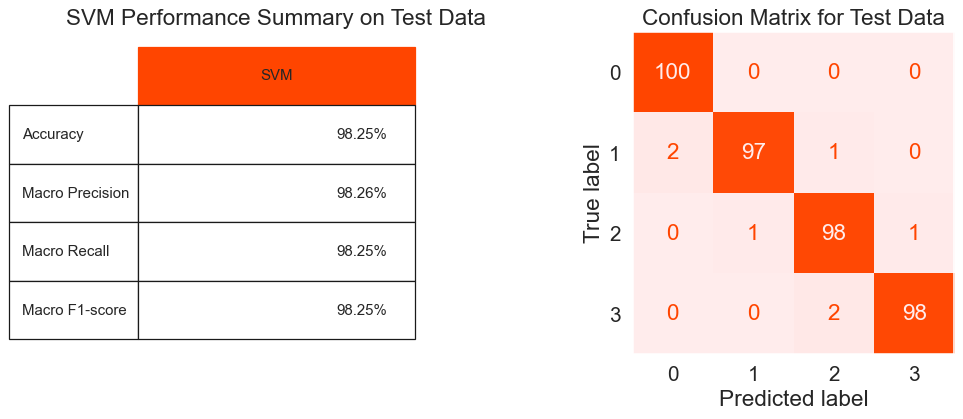

In [32]:
model_evaluation(svm_optimized, X_train, X_test, y_train, y_test, 'SVM')

***
For the **SVM classifier**, we got the remarkable **98.25%** accuracy even though our **dataset was noisy!** If we examine the confusion matrix of the model, out of **400** mobile phones, the model made errors just in **7** cases to predict their price range.

In [33]:
svm_result = metrics_calculator(svm_optimized, X_test, y_test, 'SVM')
svm_result

,SVM
Accuracy,98.25%
Macro Precision,98.26%
Macro Recall,98.25%
Macro F1-score,98.25%


## Step 8 | Decision Tree Model Building

### Decision Tree:
**Decision Tree** is a supervised machine learning algorithm that uses a tree-like model of decisions and their possible consequences. It works by recursively splitting the data into subsets based on the values of the features, with the goal of minimizing a criterion, such as `Gini impurity` or `entropy`.

***
### Note:
**Decision Trees** do not require **standard scaling** of the data before model building. Standard scaling is typically used for algorithms that are sensitive to the scale of the input features, such as **distance-based algorithms** like **KNN** and **SVM** and **kmeans**.
***

### Step 8.1 | Noise Treatment using KNN Imputer

**Decision Tree** is a **noise-sensitive** algorithm and **prone to overfitting**, especially when trained with noisy data. Therefore, we need to clear the data set from the noise. Since the number of noise values detected in the dataset in step **5.3** is high, we cannot remove the corresponding rows from the dataset. On the other hand, `px_height` and `sc_w` containing noise values, are considered important features in target estimation and we cannot remove any of them from the dataset. Therefore, we use **KNNImputer** to impute these noise values:
***

### KNN Imputer:
- **KNN Imputer** is a machine learning technique used to **impute or fill in missing values** and noise values in a dataset. The technique works by finding the **k-nearest neighbors** of a data point with missing values and then imputing the missing values with the **average** of those neighbors.

***

In [34]:
df_denoised = df.copy() 
df_denoised.loc[sc_w_NoiseIndex, "sc_w"] = np.nan 
df_denoised.loc[px_height_NoiseIndex, "px_height"] = np.nan 
imputer = KNNImputer(n_neighbors=2) 
# Impute or clean the noise values
imputed_data = imputer.fit_transform(df_denoised) 
df_denoised = pd.DataFrame(imputed_data, columns=df_denoised.columns)
X_denoised = df_denoised.drop("price_range", axis=1) 
df_denoised["price_range"] = df_denoised["price_range"].astype(int) 
y = df_denoised["price_range"]

### Step 8.2 | Decision Tree Hyperparameter Tuning

### Decision Tree Hyperparameter Tuning:
Hyperparameter tuning is crucial for decision trees because they are prone to overfitting. Overfitting occurs when the tree is **too complex** and fits the **training data too closely**, **capturing even the noise in the data**. **Tuning the hyperparameters** can help to **avoid overfitting** and improve the performance of the model on new, unseen data.

Again, we define our hyperparameters grid using the above hyperparameteres and then call tune_hyperparameters function to find the best combination:



In [35]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2']} 

Let's call tune_hyperparameters function for hyperparameter tuning:



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_denoised, y, test_size=0.2, random_state=0, stratify=y)
dt = DecisionTreeClassifier(random_state=0)
dt_optimized = tune_hyperparameters(dt, param_grid, X_train, y_train) 

Best hyperparameters:
 {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 8}


### Step 8.3 | Decision Tree Feature Subset Selection

In step 6, by examining the features with respect to the target variable, we realized that there are a number of features that do not have a large effect in the target estimation. By removing irrelevant features from the dataset using feature selection techniques, we can simplify our decision tree and reduce its complexity, which can lead to improve the accuracy of the model by reducing **model overfitting**. Therefore, in the following, we will use the drop_column_importance_plot function defined in Step 5.4.2 in order to implement the **Drop-column Feature Importance technique** to detect redundant features:

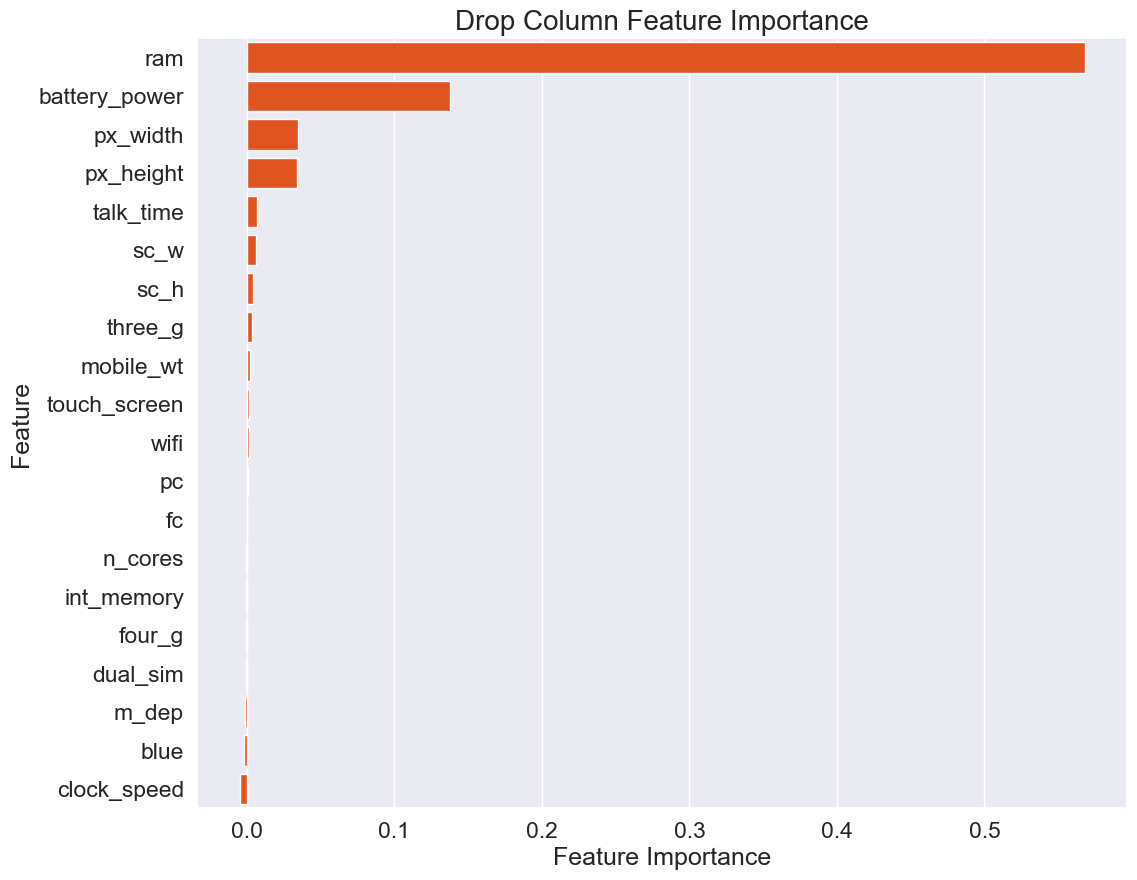

In [37]:
drop_column_importance_plot(dt_optimized, X_train, y_train)

In the Drop-Column feature importance output results, several features with negative importance are observed. Removing these features improves the performance of the model. Let's filter our the dataset:

In [38]:
feature_importances = drop_column_importance(dt_optimized, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']
X_train = X_train[selected_features] 
X_test = X_test[selected_features]

We can see the **remaining features** in the dataset (relavant features):

In [39]:
pd.DataFrame(selected_features)

,feature
0,ram
1,battery_power
2,px_width
3,px_height


Let's tune the hyperparameters of our model again after removing the irrelevant features:


In [40]:
dt = DecisionTreeClassifier(random_state=0)
dt_optimized = tune_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 7}


### Step 8.4 | Decision Tree Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.96      0.94      0.95       400
           2       0.91      0.97      0.94       400
           3       0.98      0.94      0.96       400

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.85      0.87      0.86       100
           2       0.82      0.85      0.83       100
           3       0.92      0.86      0.89       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88 

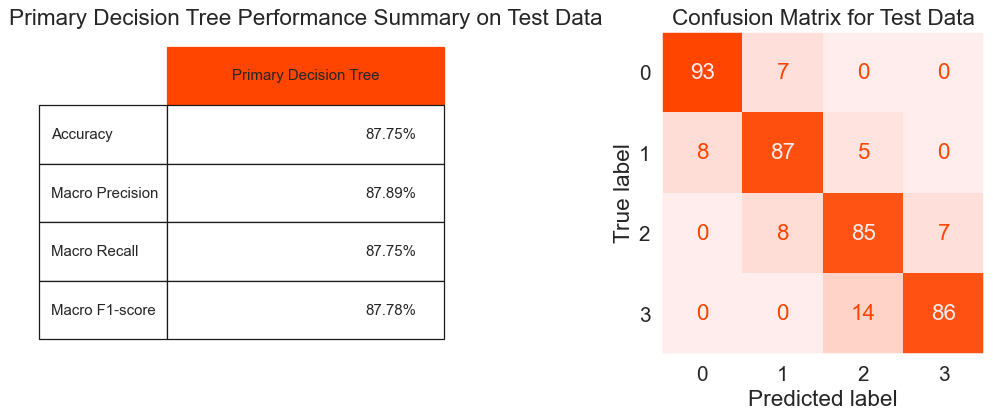

In [41]:
model_evaluation(dt_optimized, X_train, X_test, y_train, y_test, 'Primary Decision Tree')

If we compare the accuracy obtained on both **training** and **test** sets, we see a **decrease of 7% on the accuracy of test set compared to training set**, which shows that the **model is fairly overfit**. Overfitting of the model is due to its high variance, and in the following, we try to prevent the model from overfitting by applying a small change in the value of hyperparameters, hoping that the performance of the model will improve on the test data.

Among the optimal values obtained for hyperparameters, we only decrease the value of max_depth from 9 to 8 in order to partially reduce the variance of the model:



In [42]:
# Build decision tree classifier considering the obtained optimal values for hyperparameters
dt_final = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=8, 
                                  max_features=None, 
                                  min_samples_leaf=3, 
                                  min_samples_split=7,
                                  random_state=0)
# Train the final decision tree classifier
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=7,
                       random_state=0)

Let's evaluate our final Decision Tree classifier:




	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       400
           1       0.95      0.94      0.94       400
           2       0.93      0.94      0.94       400
           3       0.97      0.95      0.96       400

    accuracy                           0.95      1600
   macro avg       0.96      0.95      0.96      1600
weighted avg       0.96      0.95      0.96      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       100
           1       0.86      0.88      0.87       100
           2       0.83      0.86      0.85       100
           3       0.94      0.87      0.90       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89 

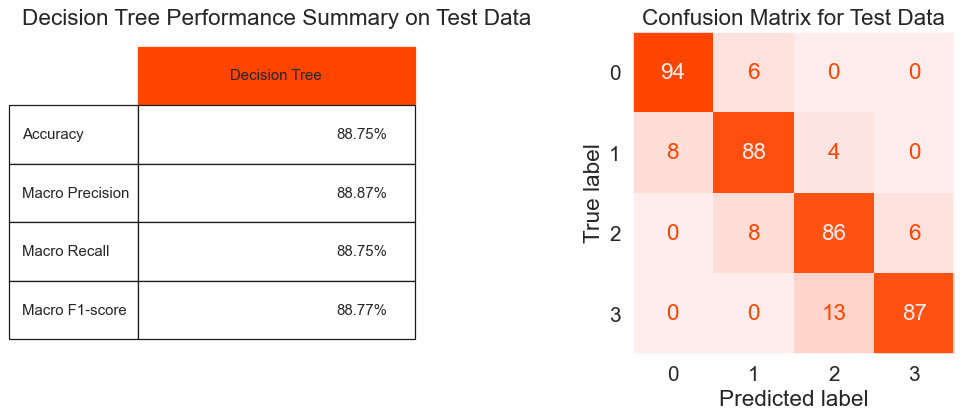

In [43]:
model_evaluation(dt_final, X_train, X_test, y_train, y_test, 'Decision Tree')

As can be seen, by using only **4 features** from the dataset in modeling (`ram`, `battery_power`, `px_width` and `px_height`), we achieved almost **89% accuracy on test data** but our decision tree classifier is still somewhat overfit. Also, the performance of decision tree model is weaker than SVM, which can be **due to the noisy nature of the dataset and the tendency of the decision tree model to overfit on noisy data**! Decision trees can be more robust to noise, especially when using ensemble methods like random forests. So, let's go on.

In [44]:
dt_result = metrics_calculator(dt_final, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,88.75%
Macro Precision,88.87%
Macro Recall,88.75%
Macro F1-score,88.77%


## Step 9 | Random Forest Model Building

### Random Forest:
**Random Forest** is an ensemble learning classifier that combines multiple decision trees to improve prediction accuracy. It randomly selects a subset of features and data points for each tree, and then combines their predictions through a voting mechanism.

***
### Step 9.1 | Random Forest Hyperparameter Tuning

#### Random Forest Hyperparameter Tuning:
Optimizing the hyperparameters of a Random Forest can improve the accuracy of the model and prevent overfitting or underfitting on the data. A Random Forest model consists of multiple decision trees, which can be either shallow or deep. Shallow trees have a limited number of branches or levels, while deep trees have many branches or levels and are not fully grown. Deep trees tend to have low bias but high variance, which makes them suitable for bagging methods that aim to reduce variance. When selecting hyperparameters for Random Forest, it is important to consider to have **deep trees** in choosing the range of values for **random forest** hyperparameters.

***
Again we set the range of values for each hyperparameter that we want to consider for our Random Forest classifier, and then use tune_hyperparameters function to find the best combination of hyperparameters that provides the best results:

In [45]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [70, 100, 120, 150],
    'max_depth': np.arange(10, 18), 
    'min_samples_split': [2, 3, 4], 
    'min_samples_leaf': [1, 2, 3] 
}

Let's call tune_hyperparameters function for hyperparameter tuning:

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_denoised, y, random_state=0, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("-"*50)
print(y.value_counts()/len(y))
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)
rf_optimized = tune_hyperparameters(rf, param_grid, X_train, y_train) 

(1600, 20)
(1600,)
(400, 20)
(400,)
--------------------------------------------------
price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: count, dtype: float64
price_range
2    0.25
0    0.25
3    0.25
1    0.25
Name: count, dtype: float64
price_range
3    0.25
2    0.25
1    0.25
0    0.25
Name: count, dtype: float64
Best hyperparameters:
 {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


### Step 9.2 | Random Forest Feature Subset Selection

Again by removing irrelevant features from the dataset using Drop-column Feature Importance, we can simplify our random forest, which can lead to improve the accuracy of the model by reducing model overfitting:

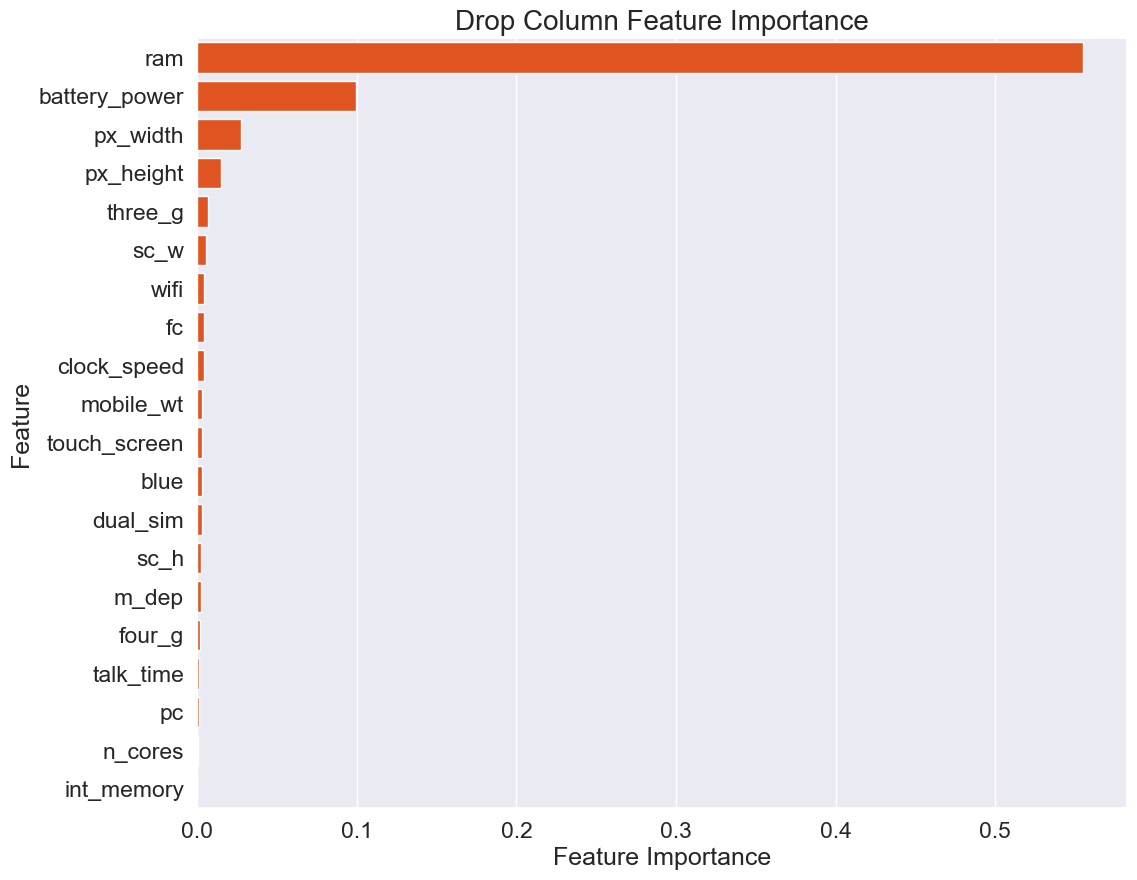

In [47]:
drop_column_importance_plot(rf_optimized, X_train, y_train) 

The results of the feature importance analysis show that some of the features in the dataset contribute negatively towards making accurate predictions for the target variable. Therefore, we remove these features from our dataset:

In [48]:
feature_importances = drop_column_importance(rf_optimized, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature'] 
print(selected_features)
X_train = X_train[selected_features] 
X_test = X_test[selected_features]

0              ram
1    battery_power
2         px_width
3        px_height
Name: feature, dtype: object


We can see the **remaining features** in the dataset (relavant features):

In [49]:
pd.DataFrame(selected_features) 

,feature
0,ram
1,battery_power
2,px_width
3,px_height


Let's tune the hyperparameters of our model again after **removing the irrelevant features**:

In [50]:
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)
rf_optimized = tune_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Step 9.3 | Random Forest Model Evaluation

Let's evaluate our Random Forest performance using model_evaluation function:




	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.91      0.91      0.91       100
           2       0.84      0.87      0.85       100
           3       0.93      0.89      0.91       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91 

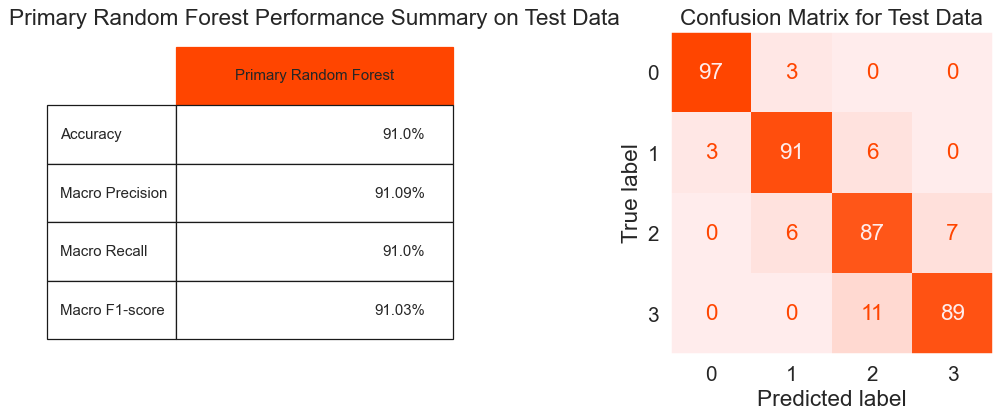

In [51]:
model_evaluation(rf_optimized, X_train, X_test, y_train, y_test, 'Primary Random Forest')

The model shows a 9% decrease in accuracy on the test set compared to the training set, indicating overfitting. Overfitting is caused by high variance, and adjusting hyperparameters is attempted to improve the model's performance on test data. Among the optimal values obtained for hyperparameters, we decrease the value of max_depth from 100 to 90 and increase the value of min_samples_leaf from 1 to 4 in order to partially avoid overfitting:

In [52]:
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0,
                                  max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=90)
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, max_features=None, min_samples_leaf=4,
                       n_estimators=90, random_state=0)

Let's evaluate our final Random Forest classifier:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       400
           1       0.96      0.97      0.97       400
           2       0.97      0.97      0.97       400
           3       0.99      0.97      0.98       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.91      0.93      0.92       100
           2       0.85      0.88      0.87       100
           3       0.93      0.89      0.91       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92 

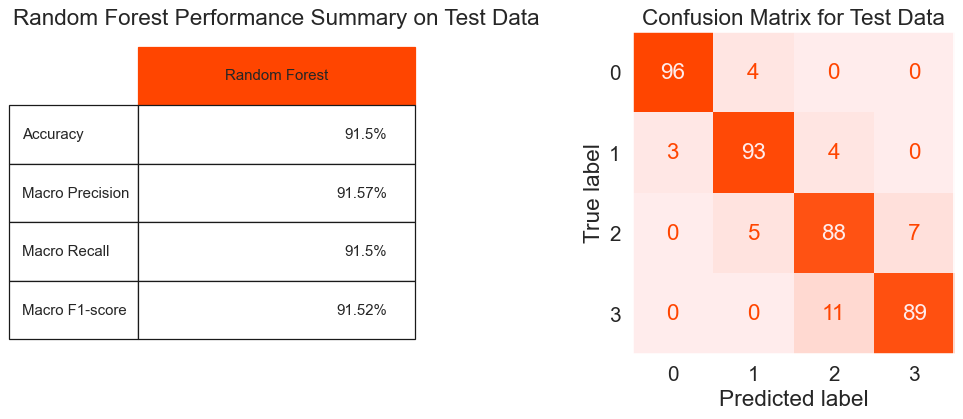

In [53]:
model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

In [54]:
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,91.5%
Macro Precision,91.57%
Macro Recall,91.5%
Macro F1-score,91.52%


## Step 10 | Conclusion & Sample Data Prediction

In this project, we faced a **multi-class classification** problem and **the main challenge** of which was **the noisy dataset and not having enough domain knowledge for dataset cleansing**. As expected, the **SVM algorithm** had a better performance than decision tree algorithms and ensemble learning algorithms based on it, such as Random Forest, due to **its lower sensitivity to noisy data**, and finally we got astonishing **98% accuracy on unseen data**.

Also, since the dataset is **completely balanced with respect to the distribution of the target classes and none of the classes have a special advantage over the other**, the **`accuracy`** metric is a proper metric to evaluate the performance of the models. In any case, we will check the performance of all three models on this dataset with the help of all metrics:

In [55]:
results = pd.concat([svm_result, dt_result, rf_result], axis=1).T
results.sort_values(by='Accuracy', ascending=False, inplace=True)
results.style.applymap(lambda x: 'background-color: orangered', subset='Accuracy') # hena ana 7a3ml color 3la el accuracy bss

,Accuracy,Macro Precision,Macro Recall,Macro F1-score
SVM,98.25%,98.26%,98.25%,98.25%
Random Forest,91.5%,91.57%,91.5%,91.52%
Decision Tree,88.75%,88.87%,88.75%,88.77%


In the following, we can check the performance of the classifiers based on accuracy in the form of a bar chart:



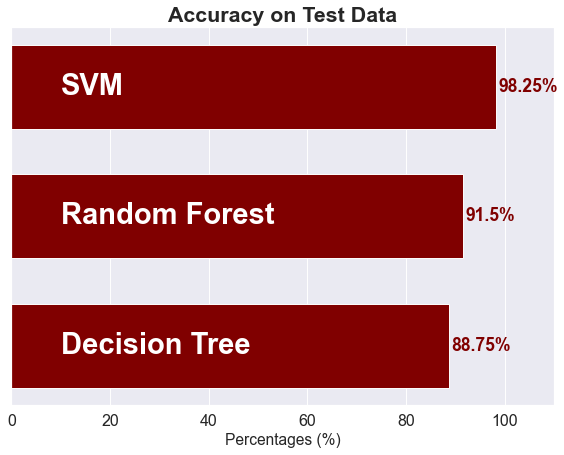

In [56]:
results.sort_values(by='Accuracy', ascending=True, inplace=True)
accuracies = results['Accuracy'].str.strip('%').astype(float)
fig, ax = plt.subplots(figsize=(10, 7), dpi=70)
ax.barh(results.index, accuracies, color='maroon', height=0.65)

for i, (value, name) in enumerate(zip(accuracies, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='maroon', fontsize=18)
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=30)

ax.set_yticks([]) 
ax.set_xlim([0,110]) 
plt.title("Accuracy on Test Data", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

**Among the examined classifiers, SVM got the best accuracy due to its resistance to noise:**

**🏆 Accuracy = 98.25%**

Finally, we predict the class for test.csv samples using the SVM model:

In [57]:
X = df.drop('price_range', axis=1) 
y = df['price_range'] 
svm_pipeline = Pipeline([
                         ('scaler', StandardScaler()), 
                         ('svm', SVC(probability=True, C=50, kernel='linear', random_state=0)) 
                        ])
svm_pipeline.fit(X, y) 
df_samples = pd.read_csv("test.csv")
df_samples.drop('id', axis=1, inplace=True) 
df_samples['price_range_pred'] = svm_pipeline.predict(df_samples) 
df_samples['price_range_pred'] 

0      3
1      3
2      2
3      3
4      1
      ..
995    2
996    1
997    0
998    2
999    2
Name: price_range_pred, Length: 1000, dtype: int64